<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Riris Melissa Winona Togatorop"
KELAS = "E"
NPM = "1906398906"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ["https://www.python-graph-gallery.com/111-custom-correlogram",
            "https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/",
            "https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/",
            "https://stackabuse.com/bytes/agglomerative-hierarchical-clustering-with-scikit-learn/",
            "https://www.naukri.com/learning/articles/k-means-clustering-in-machine-learning/",
            "https://www.mathworks.com/matlabcentral/answers/367432-k-means-clustering-giving-different-results",
            "https://www.researchgate.net/publication/280627665_A_Comparative_Study_Of_Fuzzy_C-Means_And_K-Means_Clustering_Techniques#pf2"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Riris Melissa Winona Togatorop dari kelas E dengan NPM 1906398906, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Riris Melissa Winona Togatorop)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [24]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [4]:
df = pd.read_csv('penguin.csv')
df.head()

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [6]:
df.describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [7]:
from statistics import mode

missingval_numeric = ["panjang_paruh_atas", "tebal_paruh_atas", "panjang_sirip", "massa_tubuh"]
missingval_nonnumeric = ["jenis_kelamin"]

# Substitusi missing values data numerik dengan nilai mean
for column in missingval_numeric:
  mean = df[column].mean()
  df[column].fillna(mean, inplace=True)

# Substitusi missing values data non numerik dengan nilai modus
mode = mode(df["jenis_kelamin"])
df["jenis_kelamin"].fillna(mode, inplace=True)

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

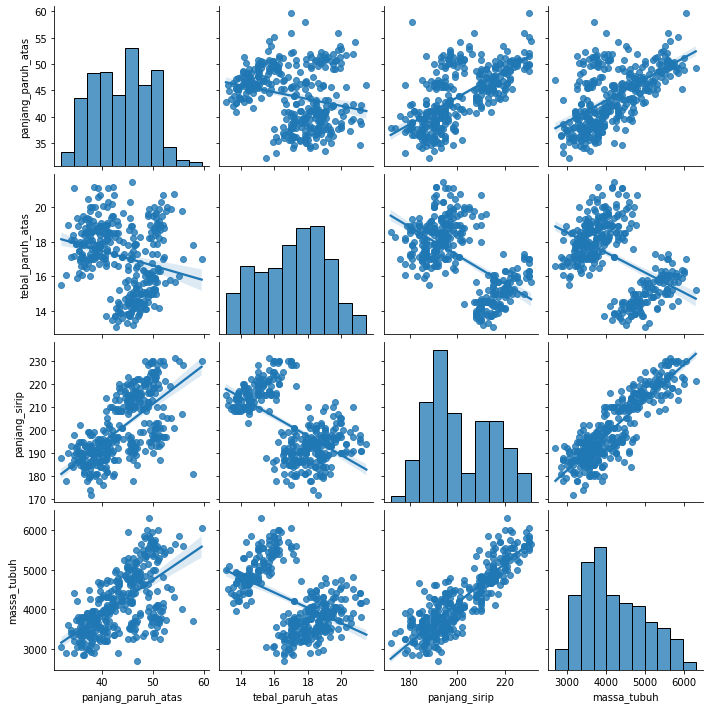

In [8]:
# with regression
sns.pairplot(df, kind="reg")
plt.show()

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]  
    `2 Atribut yang ingin saya gunakan adalah panjang paruh atas dan tebal paruh atas. Alasan saya memilih kedua atribut tersebut adalah karena berdasarkan persebaran data yang bisa dilihat pada scatterplot bahwa persebaran data panjang paruh atas dan tebal paruh atas tersebar cukup luas sehingga tepat untuk diklasifikasikan.`

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


In [9]:
# #import libraries
import random as rd

7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [10]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df[["tebal_paruh_atas", "panjang_paruh_atas"]].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


For n_clusters = 2 The average silhouette_score is : 0.5698329493331663
For n_clusters = 3 The average silhouette_score is : 0.4871856367763273
For n_clusters = 4 The average silhouette_score is : 0.43648046228421933
For n_clusters = 5 The average silhouette_score is : 0.40367368526224956
For n_clusters = 6 The average silhouette_score is : 0.43034018806659535


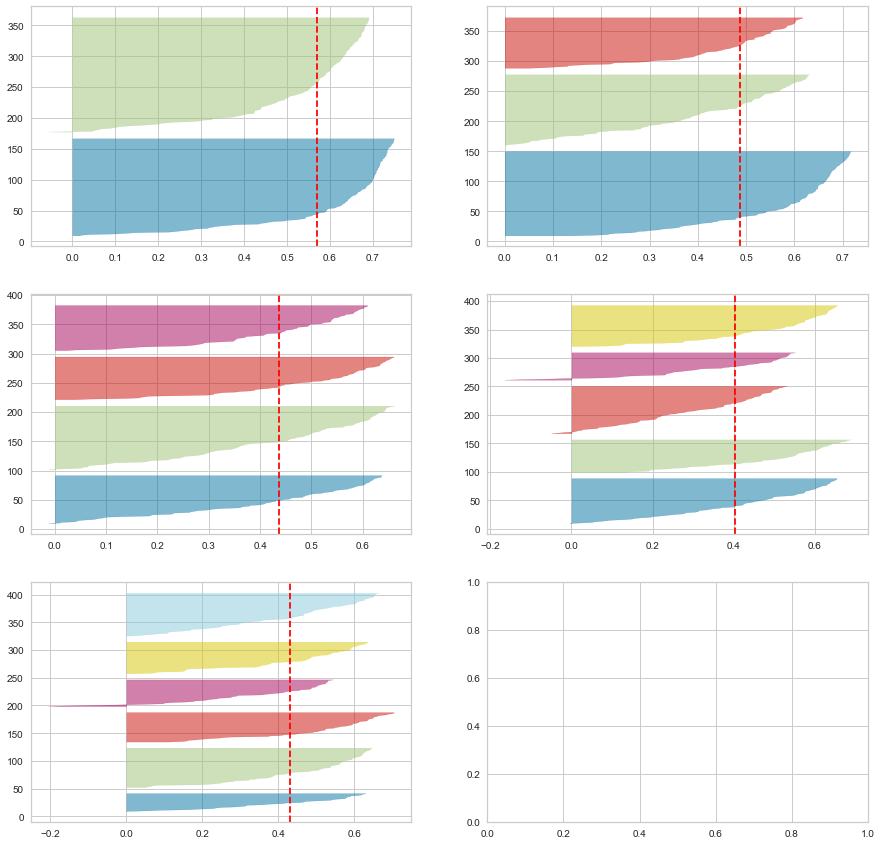

In [11]:
from sklearn import datasets
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

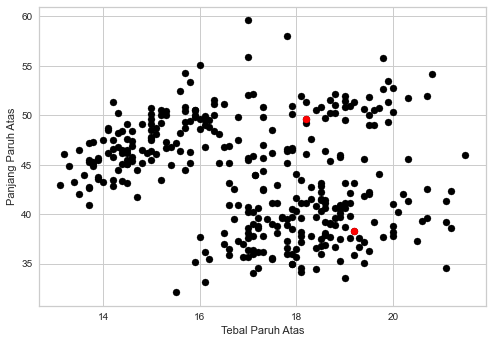

In [19]:
# Langkah 1 -  Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak

#number of clusters
K=2

# Select random observation as centroids
Centroids = (df.sample(n=K))
plt.scatter(df["tebal_paruh_atas"],df["panjang_paruh_atas"],c='black')
plt.scatter(Centroids["tebal_paruh_atas"],Centroids["panjang_paruh_atas"],c='red')
plt.xlabel('Tebal Paruh Atas')
plt.ylabel('Panjang Paruh Atas')
plt.show()

In [20]:
# Langkah 2 - Mengelompokkan titik-titik data yang ada ke centroid terdekat
# Langkah 3 - Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
# Langkah 4 - Mengulangi langkah 1-3 sampai memenuhi stopping

diff = 1
j=0

while(diff!=0):
    XD=df
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["tebal_paruh_atas"]-row_d["tebal_paruh_atas"])**2
            d2=(row_c["panjang_paruh_atas"]-row_d["panjang_paruh_atas"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["panjang_paruh_atas","tebal_paruh_atas"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['panjang_paruh_atas'] - Centroids['panjang_paruh_atas']).sum() + (Centroids_new['tebal_paruh_atas'] - Centroids['tebal_paruh_atas']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["panjang_paruh_atas","tebal_paruh_atas"]]

-0.16990744229469712
-0.13007706396189533
0.0


9. Visualisasikan klaster yang ada [5]

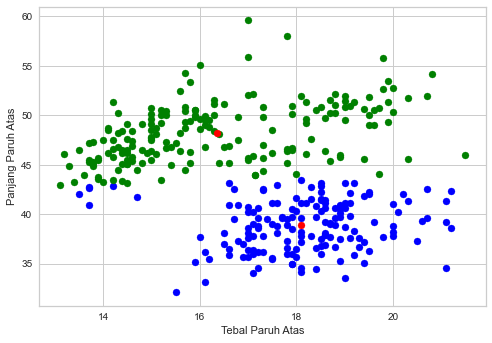

In [21]:
color=['blue','green']
for k in range(K):
    data=df[df["Cluster"]==k+1]
    plt.scatter(data["tebal_paruh_atas"],data["panjang_paruh_atas"],c=color[k])
plt.scatter(Centroids["tebal_paruh_atas"],Centroids["panjang_paruh_atas"],c='red')
plt.xlabel('Tebal Paruh Atas')
plt.ylabel('Panjang Paruh Atas')
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]  
    `Berdasarkan hasil clustering pada visualisasi di atas, terdapat 2 klaster penguin: Pertama adalah klaster berwarna hijau yang mengklasterisasi penguin dengan panjang paruh atas lebih besar dari kisaran 43, sedangkan klaster yang berwarna biru merupakan klaster penguin dengan panjang paruh atas dibawah kisaran 43.`

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [26]:
clustering_model_no_clusters = AgglomerativeClustering(linkage="ward")
clustering_model_no_clusters.fit(X)
labels_no_clusters = clustering_model_no_clusters.labels_

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

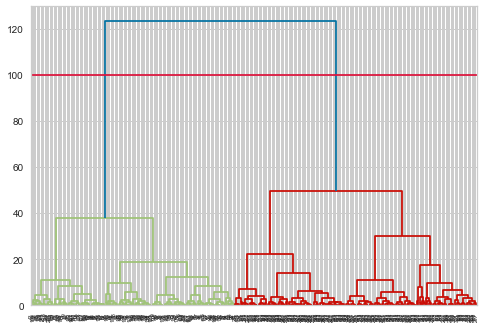

In [27]:

clusters = shc.linkage(X, method="ward")
dendrogram = shc.dendrogram(clusters)

# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(100, color='crimson'); 

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [28]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

14. Visualisasikan hasil *clustering assignment* [4]

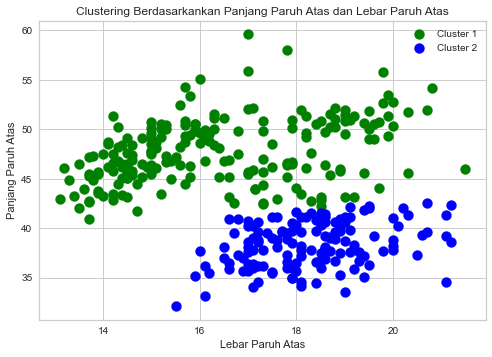

In [29]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.title('Clustering Berdasarkankan Panjang Paruh Atas dan Lebar Paruh Atas')
plt.xlabel('Lebar Paruh Atas')
plt.ylabel('Panjang Paruh Atas')
plt.legend()
plt.show()

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]  
`Jika terdapat categorical value, kita dapat melakukan encoding data categorical menjadi numerical. Misalnya data kategorikal yang ordinal atau memiliki tingkatan seperti pendek-sedang-tinggi, dapat di konversi menjadi 1-2-3. Selain itu, kita dapat menggunakan package category_encoders dari python untuk memudahkan encoding.`
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]  
`K-Means kurang cocok untuk diterapkan pada dataset yang non-globular karena algoritma K-means menggunakan centroid sebagai referensi sehingga tidak dapat memperoleh informasi dengan baik jika penyeberannya tidak globular.`
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]  
`Method KMeans dari sklearn tidak memberikan hasil yang sama setiap kali dijalankan. Hal ini karena K-means memang melibatkan proses pemilihan secara acak untuk memilih centroid awal. Oleh karena itu, hasil yang diperoleh pun dapat berubah setiap kali dijalankan.`
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]  
`Intercluster menunjukkan jarak antara titik data dengan pusat cluster, sedangkan intra-class cluster menunjukkan jarak antara titik data dari sebuah cluster dengan titik data pada cluster lainnya. Metode clustering yang baik akan menghasilkan cluster dengan intra-class similarity yang tinggi dan inter-class similarity yang rendah`

Cara menghitung intracluster similarity  
![image](intracluster.png)

Cara menghitung inter-cluster dissimilarity  
![image](intercluster.png)